# Percent Changes per Year in Budgets, Expenditures
I want to plot how much the budgets for these agencies change year by year. I also want to look at what % of thier budgets they spend and how that changes year to year

In [30]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [31]:
import pandas as pd

In [32]:
import sys
import os
sys.path.insert(0, os.path.abspath('../'))
sys.path.insert(0, os.path.abspath('../..'))
import Initialize_Agencies
import Agency_Classes
import Exploratory_Main
import seaborn as sns
import matplotlib.pyplot as plt
from budget_vs_expenditures import melt_budget
from revenues import visualize_revenues, visualize_revenues_pt2
from Percent_Changes_Jul16 import get_big_df
from plot_change_over_time import plot_change_over_time
pd.set_option('display.float_format', lambda x: '%.3f' % x)

To start, from each agency I want a single number per year which is total enacted + revenues minus 9c, which is the best way to calculate a final number that we've come up with yet

Before I continue, I'm going to learn to use lappaly and make my code neater

In [37]:
big_df = get_big_df()

,Category,2016,2017,2018,2019,2020
trial_court Total Budget,Legal,631522409.000,639140097.000,656610964.000,687447792.000,739041693.000
trial_court Total Expenditures,Legal,618213422.800,627772811.470,637937900.130,680877850.930,697847339.260
trial_court Percent Change in Budget Since 2016,Legal,1.000,1.012,1.040,1.089,1.170
trial_court Percent of Budget Spent,Legal,0.979,0.982,0.972,0.990,0.944
CPCS Total Budget,Legal,215847857.000,229970453.000,173454716.000,251767237.000,251874213.000
CPCS Total Expenditures,Legal,214500389.110,233213085.610,232705701.900,247949233.150,234095958.910
CPCS Percent Change in Budget Since 2016,Legal,1.000,1.065,0.804,1.166,1.167
CPCS Percent of Budget Spent,Legal,0.994,1.014,1.342,0.985,0.929
DOC Total Budget,Jails,602093531.470,629738079.250,668583130.470,699052218.000,724348337.560
DOC Total Expenditures,Jails,597743780.690,624213748.820,651237588.780,706502980.600,721744250.350


In [39]:
416762371 + 7519387 + 8502943

432784701

Ok cool, that looks good. Following code is adopted from melt_budget in budget_vs_expenditures

In [40]:
pcnt_changes = big_df[big_df.index.str.contains("Percent Change")]


In [41]:
melted = melt_budget(pcnt_changes)

In [42]:
melted["index"] = [x.split("Percent")[0] if x!= "Percent Change in Total Budget From All Agencies Since 2016" 
                   else "All Agencies" for x in melted["index"]]

Ok, that looks good. Time to make a plot. Code below is adopted from budget_vs_expenditures from budget_vs_expenditures

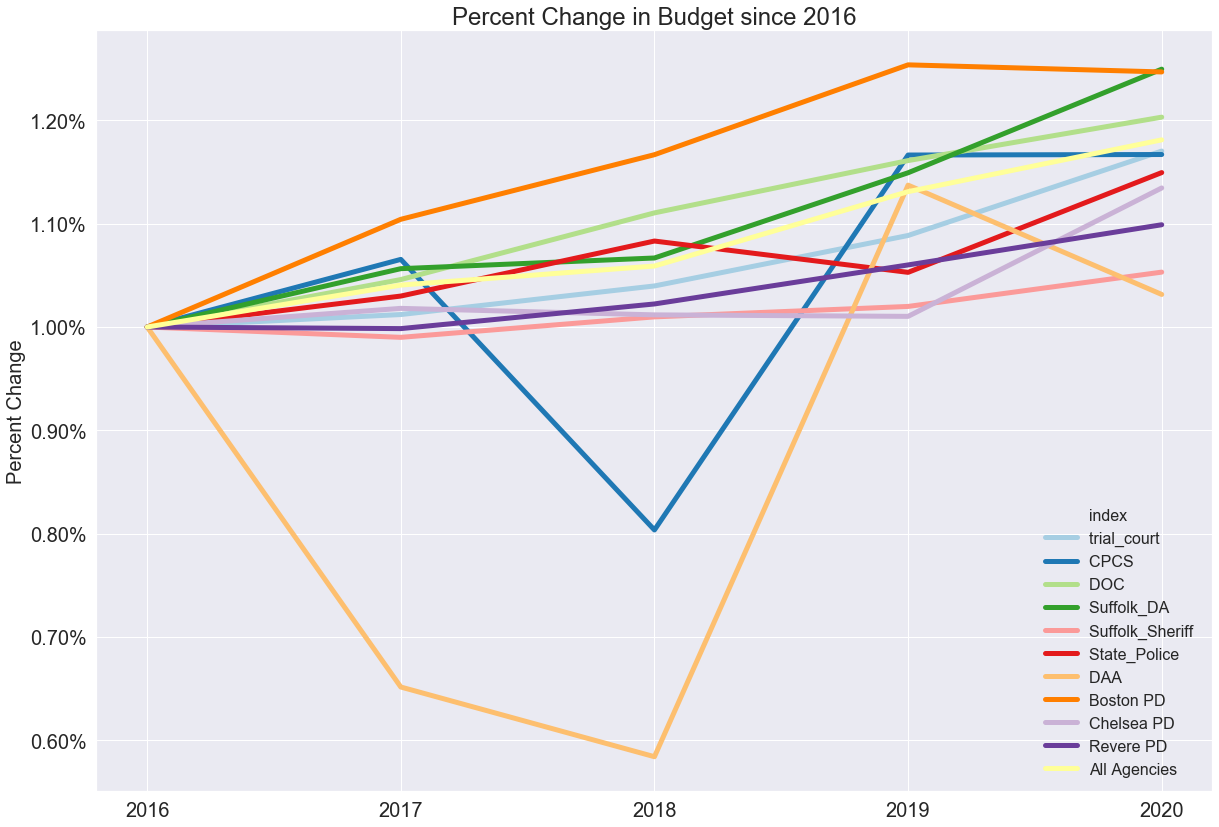

In [43]:
plot_change_over_time(melted, "Percent Change in Budget since 2016", list(range(2016,2021)))

Ok, it was a nice idea but doesn't show any interesting patterns right off the bat

Another thing I could add is only taking 14% of the state agency numbers to reflect that 14% of the state's population lives in Suffolk county. But I'll save that for later, next create this table but for categories instead of agencies

In [119]:
by_cat = get_big_df(True)
by_cat

/Users/alexanderweinstein/Documents/Harris/Summer2020/Carceral_Budgeting/Exploratory/visualize/PercentChanges/Percent_Changes_Jul16.py:76: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  big_df["index"] = big_df["Category"] + [x.split("Total")[1] for x in big_df["index"]]


,2016,2017,2018,2019,2020
index,,,,,
Jails Budget,706585877.470,733185502.250,774099501.470,805623753.000,834389387.560
Jails Expenditures,703223248.730,732890018.700,762314401.620,821728485.880,833086598.960
Legal Budget,1240901287.000,1297157891.000,1279583435.000,1425122657.000,1477181894.000
Legal Expenditures,1229419213.280,1287542531.020,1342883706.070,1399618917.080,959594658.730
Police Budget,360912113.970,371720874.440,390934078.610,379996934.060,414839774.000
Police Expenditures,366369627.600,365244574.390,380149184.380,371308829.050,445596005.700
Percent Change in Budget Since 2016 for Legal,1.000,1.045,1.031,1.148,1.190
Percent of Budget Spent forLegal,0.991,0.993,1.049,0.982,0.650
Percent Change in Budget Since 2016 for Jails,1.000,1.038,1.096,1.140,1.181


In [120]:
melted_cat = melt_budget(by_cat[by_cat.index.str.contains("Percent Change in Budget")])
melted_cat

,index,year,value
0,Percent Change in Budget Since 2016 for Legal,2016,1.000
1,Percent Change in Budget Since 2016 for Jails,2016,1.000
2,Percent Change in Budget Since 2016 for Police,2016,1.000
3,Percent Change in Budget Since 2016 for Legal,2017,1.045
4,Percent Change in Budget Since 2016 for Jails,2017,1.038
5,Percent Change in Budget Since 2016 for Police,2017,1.030
6,Percent Change in Budget Since 2016 for Legal,2018,1.031
7,Percent Change in Budget Since 2016 for Jails,2018,1.096
8,Percent Change in Budget Since 2016 for Police,2018,1.083
9,Percent Change in Budget Since 2016 for Legal,2019,1.148


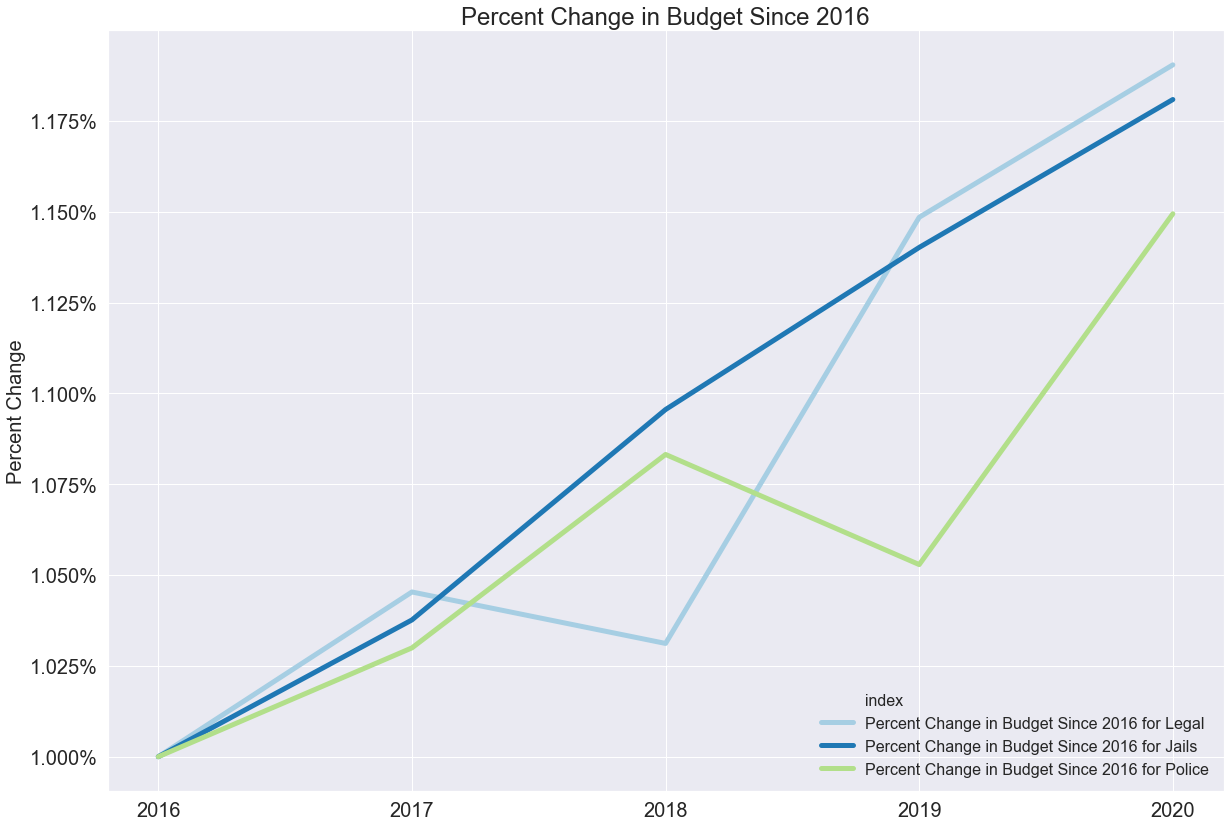

In [121]:
plot_change_over_time(melted_cat, "Percent Change in Budget Since 2016", list(range(2016, 2021)))